In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('investor_startup.csv')

# Display the first few rows of the data
display(data.head())

for i in data.columns:print(i)

,Unnamed: 0,investment_uuid,funding_round_uuid,investor_uuid,investor_name,investor_type,is_lead_investor,investor_roles,Investor_country_code,investor_region,...,total_funding_usd,founded_on_y,last_funding_on,closed_on_y,employee_count,alias1,alias2,alias3,primary_role,num_exits
0,0,524986f0-3049-54a4-fa72-f60897a5e61d,d950d7a5-79ff-fb93-ca87-13386b0e2feb,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,organization,True,"company,investor",USA,California,...,2.335700e+09,2004-02-04,2012-03-10,NaN,10000+,NaN,NaN,NaN,company,NaN
1,1,6556ab92-6465-25aa-1ffc-7f8b4b09a476,6fae3958-a001-27c0-fb7e-666266aedd78,e2006571-6b7a-e477-002a-f7014f48a7e3,Greylock Partners,organization,True,investor,USA,California,...,2.335700e+09,2004-02-04,2012-03-10,NaN,10000+,NaN,NaN,NaN,company,NaN
2,2,0216e06a-61f8-9cf1-19ba-20811229c53e,6fae3958-a001-27c0-fb7e-666266aedd78,8d5c7e48-82da-3025-dd46-346a31bab86f,Meritech Capital Partners,organization,True,investor,USA,California,...,2.335700e+09,2004-02-04,2012-03-10,NaN,10000+,NaN,NaN,NaN,company,NaN
3,3,dadd7d86-520d-5e35-3033-fc1d8792ab91,bcd5a63d-ed99-6963-0dd2-e36f6582f846,7ca12f7a-2f8e-48b4-a8d1-1a33a0e275b9,Trinity Ventures,organization,NaN,investor,USA,California,...,4.343413e+07,2003-06-01,2016-08-08,NaN,101-250,Ontela,Photobucket,NaN,company,1.0
4,4,581c4b38-9653-7117-9bd4-7ffe5c7eba69,60e6afd9-1215-465a-dd17-0ed600d4e29b,fb2f8884-ec07-895a-48d7-d9a9d4d7175c,Founders Fund,organization,True,investor,USA,California,...,1.500000e+07,2006-06-01,2009-01-19,NaN,11-50,NaN,NaN,NaN,company,NaN


Unnamed: 0
investment_uuid
funding_round_uuid
investor_uuid
investor_name
investor_type
is_lead_investor
investor_roles
Investor_country_code
investor_region
investor_city
vc_types
investment_count
total_funding
founded_on_x
closed_on_x
org_country_code
state_code_y
org_region
org_city
Investment_round
announced_on
raised_amount
post_money_valuation
investor_count
org_uuid
org_name
lead_investor_uuids
uuid
roles
country_code
region
city
address
postal_code
status
category_list
category_groups_list
num_funding_rounds
total_funding_usd
founded_on_y
last_funding_on
closed_on_y
employee_count
alias1
alias2
alias3
primary_role
num_exits


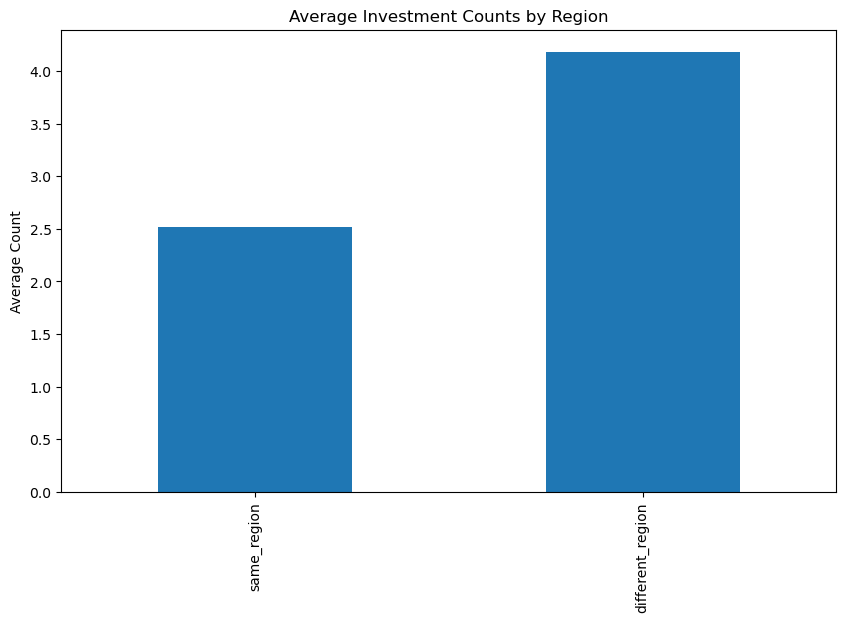

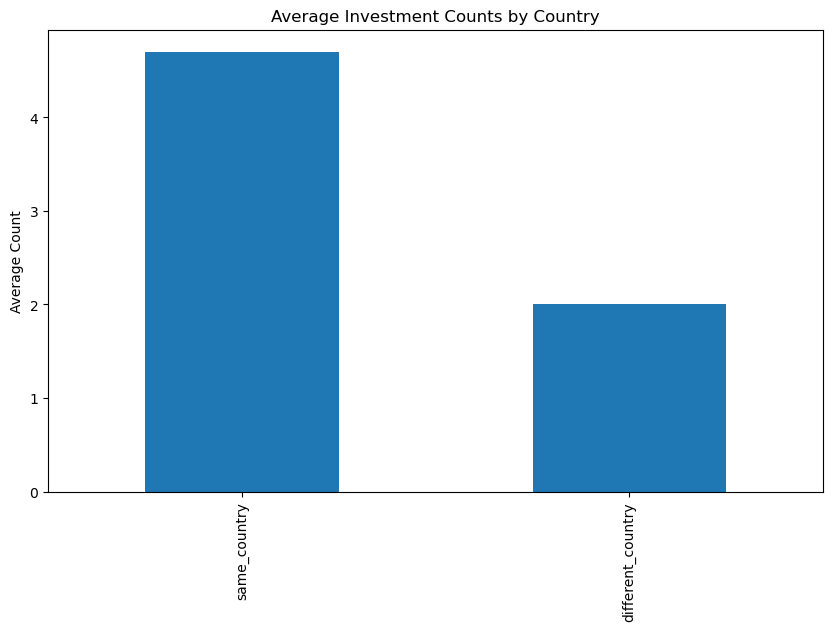

In [30]:
import pandas as pd

# Sample data (replace with your own data loading method)
# data = pd.read_csv('your_data.csv')

# For the purpose of illustration, let's assume the data is loaded into a DataFrame named 'data'

# 1. For Region:

# Count investments in the same region
data['same_region'] = (data['investor_region'] == data['org_region']).astype(int)

# Count investments in different regions
data['different_region'] = (data['investor_region'] != data['org_region']).astype(int)

# Group by investor and sum the counts
region_counts = data.groupby('investor_uuid')[['same_region', 'different_region']].sum()

# Average across all investors
avg_region_counts = region_counts.mean()

# 2. For Country:

# Count investments in the same country
data['same_country'] = (data['Investor_country_code'] == data['org_country_code']).astype(int)

# Count investments in different countries
data['different_country'] = (data['Investor_country_code'] != data['org_country_code']).astype(int)

# Group by investor and sum the counts
country_counts = data.groupby('investor_uuid')[['same_country', 'different_country']].sum()

# Average across all investors
avg_country_counts = country_counts.mean()

# Now, you can plot the results using your preferred plotting library (e.g., matplotlib, seaborn, etc.)

import matplotlib.pyplot as plt

# Plotting for Region
plt.figure(figsize=(10, 6))
avg_region_counts.plot(kind='bar', title='Average Investment Counts by Region')
plt.ylabel('Average Count')
plt.show()

# Plotting for Country
plt.figure(figsize=(10, 6))
avg_country_counts.plot(kind='bar', title='Average Investment Counts by Country')
plt.ylabel('Average Count')
plt.show()


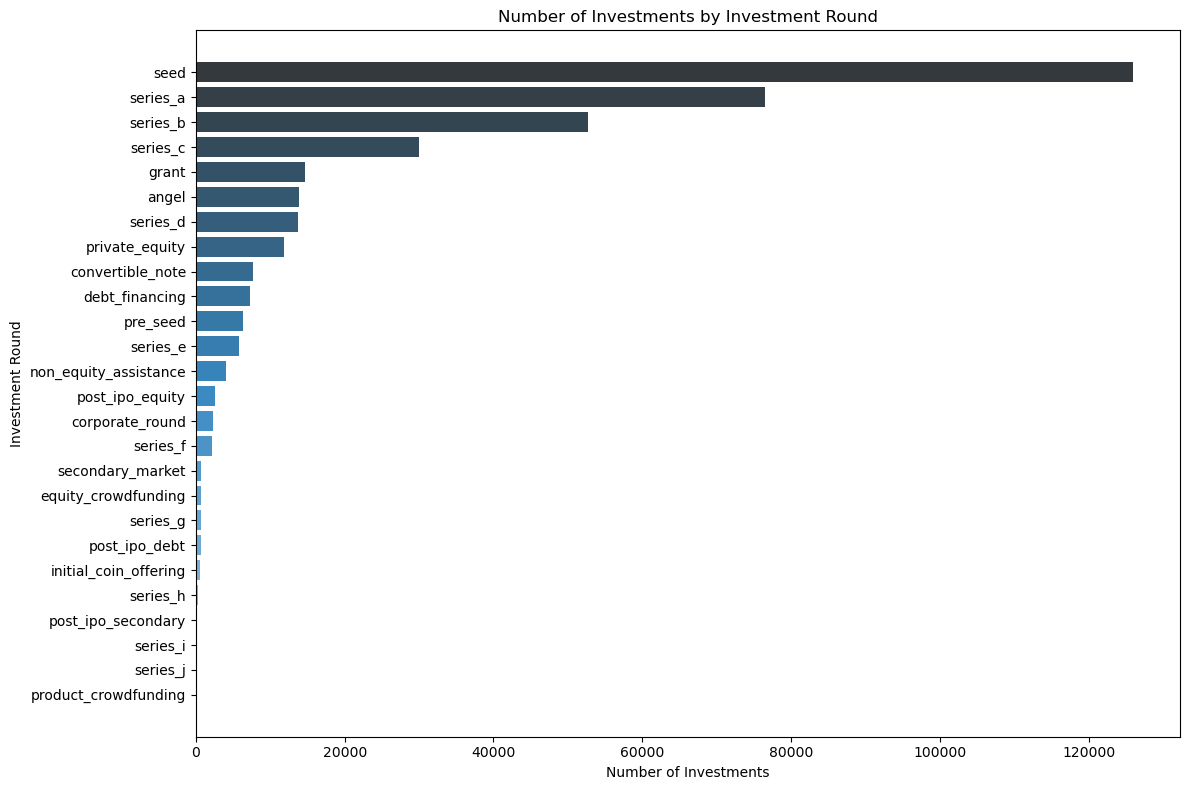

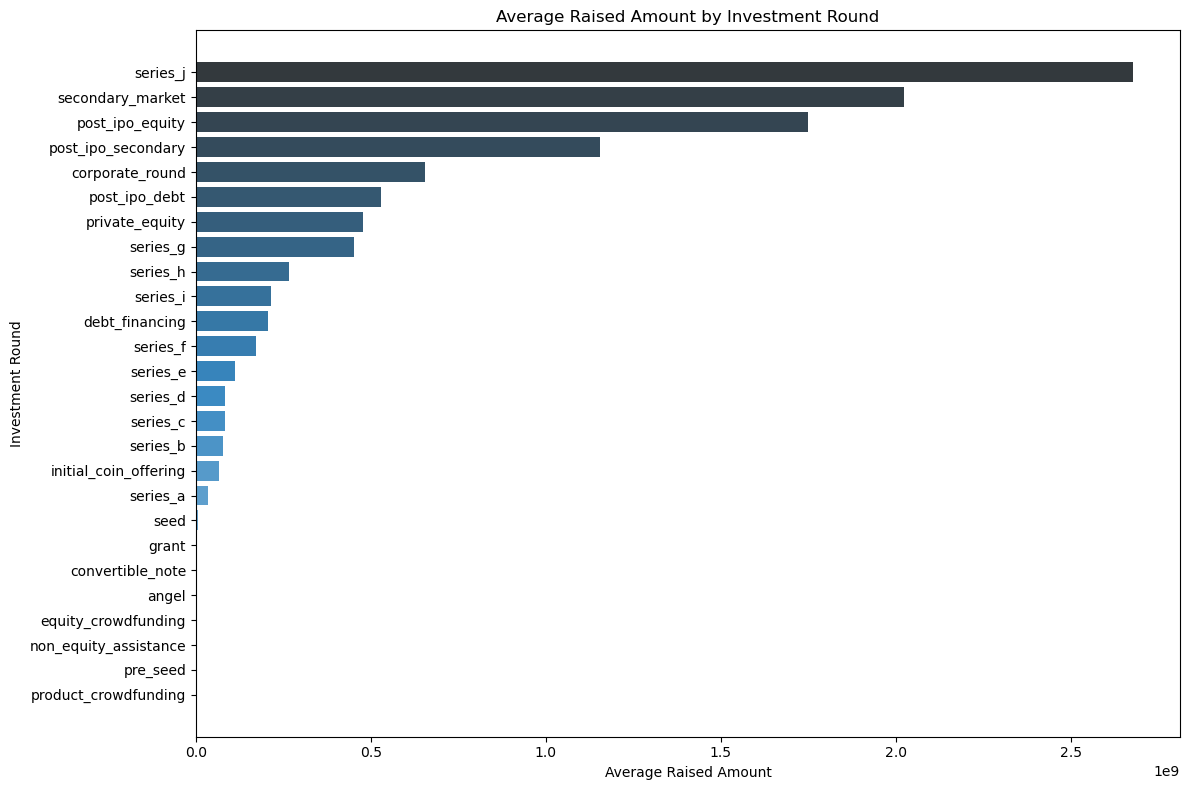

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data is loaded into a DataFrame named 'data'

# Filter out rows where Investment_round is 'undisclosed' or 'series_unknown'
filtered_data = data[~data['Investment_round'].isin(['undisclosed', 'series_unknown'])]

# 1. Number of investments across different rounds
# Enhanced plotting code for both visualizations

# 1. Number of investments across different rounds
investments_count = filtered_data['Investment_round'].value_counts().sort_values()
colors_investments = sns.color_palette("Blues_d", n_colors=len(investments_count))

plt.figure(figsize=(12, 8))
bars1 = plt.barh(investments_count.index, investments_count.values, color=colors_investments)

# Annotate bars with values
for bar in bars1:
    plt.text(bar.get_width() - (0.02 * max(investments_count.values)),  # X position
             bar.get_y() + bar.get_height()/2,                          # Y position
             ' ',                                 # Text
             va='center', ha='right', color='white', weight='bold')

plt.title('Number of Investments by Investment Round')
plt.xlabel('Number of Investments')
plt.ylabel('Investment Round')
plt.tight_layout()
plt.show()

filtered_data = data[~data['Investment_round'].isin(['undisclosed', 'series_unknown'])]

# Calculate average raised amount for each investment round
avg_raised = filtered_data.groupby('Investment_round')['raised_amount'].mean().sort_values()

# 2. Average raised amount across different rounds
colors_avg_raised = sns.color_palette("Blues_d", n_colors=len(avg_raised))

plt.figure(figsize=(12, 8))
bars2 = plt.barh(avg_raised.index, avg_raised.values, color=colors_avg_raised)

# Annotate bars with values
for bar in bars2:
    plt.text(bar.get_width() - (0.02 * max(avg_raised.values)),   # X position
             bar.get_y() + bar.get_height()/2,
             ' ',# Text
             va='center', ha='right', color='white', weight='bold')

plt.title('Average Raised Amount by Investment Round')
plt.xlabel('Average Raised Amount')
plt.ylabel('Investment Round')
plt.tight_layout()
plt.show()


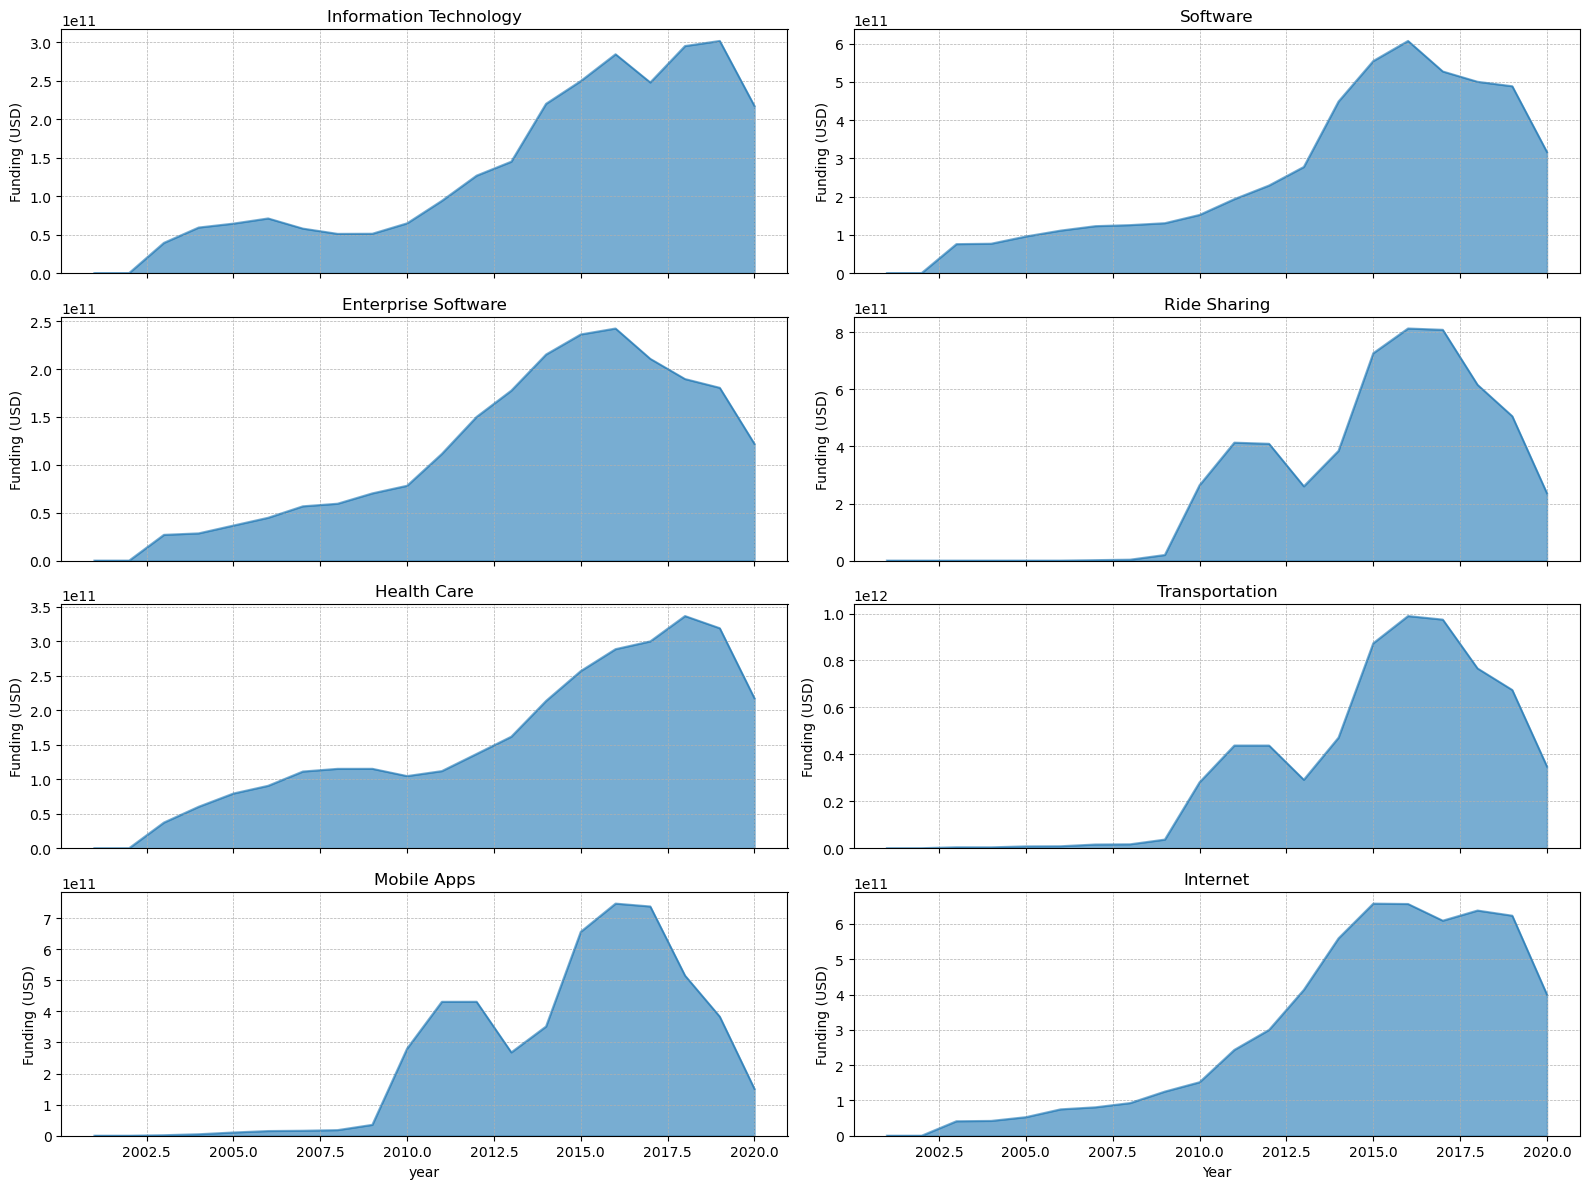

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you've already loaded your data into a DataFrame named 'data'

# Convert the 'announced_on' column to datetime format
data['announced_on'] = pd.to_datetime(data['announced_on'])

# Split the 'category_list' column to separate individual categories
data_exploded = data.assign(category_list=data['category_list'].str.split(',')).explode('category_list')

# Group by 'announced_on' and the separated 'category_list' 
grouped_data = data_exploded.groupby(['announced_on', 'category_list'])['total_funding_usd'].sum().reset_index()

# Extract the year from the 'announced_on' column
grouped_data['year'] = grouped_data['announced_on'].dt.year

# Identify the top 5 categories based on cumulative funding from the exploded data
top_funding_exploded_categories = grouped_data.groupby('category_list')['total_funding_usd'].sum().nlargest(5).index.tolist()

# Identify the top 5 categories based on frequency from the exploded data
top_frequency_exploded_categories = grouped_data['category_list'].value_counts().nlargest(5).index.tolist()

# Combine and deduplicate the lists
selected_exploded_categories = list(set(top_funding_exploded_categories + top_frequency_exploded_categories))

# Filter the data for the selected categories and pivot for yearly data
yearly_data = grouped_data[grouped_data['category_list'].isin(selected_exploded_categories)].groupby(['year', 'category_list'])['total_funding_usd'].sum().unstack().fillna(0)
yearly_data = yearly_data[yearly_data.index > 2000]

# Apply rolling average for smoothing
smoothed_data = yearly_data.rolling(window=3).mean()

# Plotting faceted area charts with two categories per row without removing any years
fig, axes = plt.subplots(nrows=int(len(selected_exploded_categories)/2), ncols=2, figsize=(16, 3 * len(selected_exploded_categories)/2), sharex=True)

axes = axes.ravel()  # Flatten the axes array for easy iteration

for ax, category in zip(axes, selected_exploded_categories):
    smoothed_data[category].fillna(0).plot.area(ax=ax, alpha=0.6)
    ax.set_title(category)
    ax.set_ylabel('Funding (USD)')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.xlabel('Year')
plt.tight_layout()
plt.show()


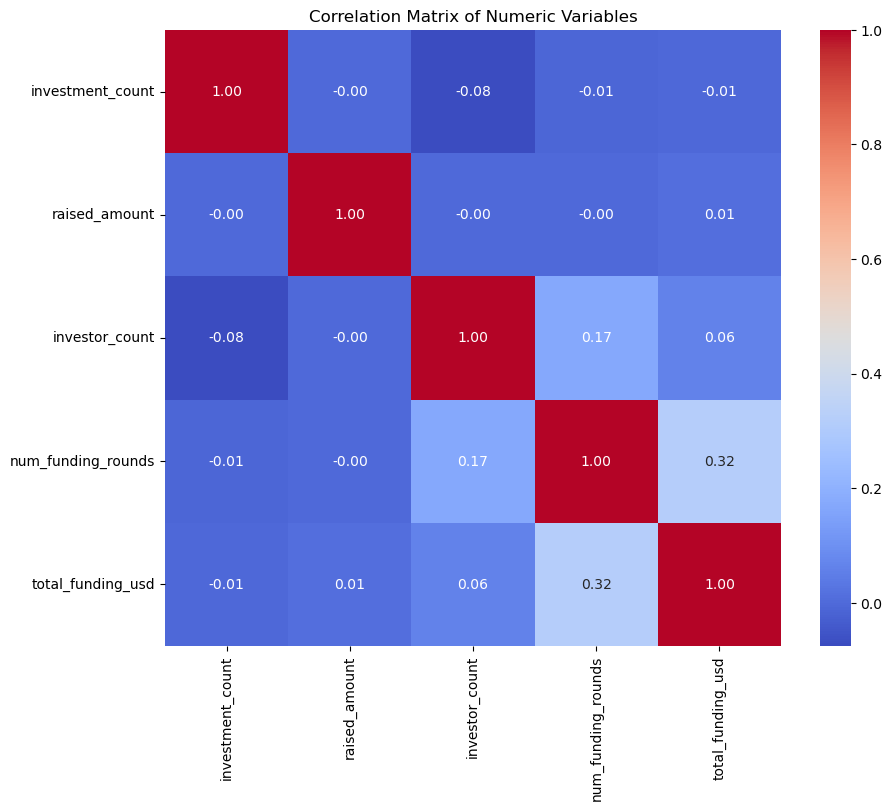

In [31]:
# Select numeric columns for correlation matrix
numeric_columns = ['investment_count', 'raised_amount', 'investor_count', 'num_funding_rounds', 'total_funding_usd']

# Calculate the correlation matrix
corr_matrix = data[numeric_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Set the title
plt.title('Correlation Matrix of Numeric Variables')

# Show the plot
plt.show()
